# Inital EDA: Diving into the metadata

## Import libraries

In [1]:
# Import libraries and modules
import numpy as np 
import pandas as pd 
import os
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Read in skin lesion metadata

In [2]:
os.listdir('../input/skin-cancer-mnist-ham10000')

['hmnist_28_28_L.csv',
 'hmnist_28_28_RGB.csv',
 'ham10000_images_part_2',
 'hmnist_8_8_RGB.csv',
 'HAM10000_images_part_1',
 'hmnist_8_8_L.csv',
 'ham10000_images_part_1',
 'HAM10000_metadata.csv',
 'HAM10000_images_part_2']

In [3]:
filepath = '../input/skin-cancer-mnist-ham10000'
metadata = pd.read_csv(f'{filepath}/HAM10000_metadata.csv')

In [4]:
metadata

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


### 52 entries have null value in place of patient age

In [5]:
metadata.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [6]:
metadata['age'].value_counts()

45.0    1299
50.0    1187
55.0    1009
40.0     985
60.0     803
70.0     756
35.0     753
65.0     731
75.0     618
30.0     464
80.0     404
85.0     290
25.0     247
20.0     169
5.0       86
15.0      77
10.0      41
0.0       39
Name: age, dtype: int64

## Out of a total of 10015 photos, there are only 7470 unique skin lesions represented. This is because there are multiple photos of some skin lesions, as can be noted by the duplicate lesion_id values wihin the metadata set.

In [7]:
print(f'There are a total of {metadata.shape[0]} skin lesion photos within the dataset.')
print(f"There are {len(metadata['lesion_id'].unique())} unique skin lesions represented within the dataset.")

There are a total of 10015 skin lesion photos within the dataset.
There are 7470 unique skin lesions represented within the dataset.


## Remove the duplicate values in order to accurately evaluate metadata distributions

In [8]:
metadata = metadata.drop_duplicates(subset='lesion_id', keep="first")

In [9]:
print(f'There are a total of {metadata.shape[0]} skin lesion photos within the dataset.')
print(f"There are {len(metadata['lesion_id'].unique())} unique skin lesions represented within the dataset.")

There are a total of 7470 skin lesion photos within the dataset.
There are 7470 unique skin lesions represented within the dataset.


In [10]:
print(f"There are {len(metadata['dx'].unique())} diagnostic classes in our target column")

There are 7 diagnostic classes in our target column


## Create distribution visualizations

### Function for plotting distributions

In [11]:
def plot_distribution(dataframe, title, xaxis, yaxis):
    plt.figure(figsize =(8, 6))
    dataframe.plot( kind = 'barh')
    plt.title(title, size = 20)
    plt.xlabel(xaxis, size = 14)
    plt.ylabel(yaxis, size = 14);
    plt.savefig(f'{title}.png', bbox_inches='tight', dpi = 300);

 Distribution of the 7 important diagnostic categories of pigmented lesions:
nv       72.329317
bkl       9.732262
mel       8.219545
bcc       4.377510
akiec     3.052209
vasc      1.311914
df        0.977242
Name: dx, dtype: float64


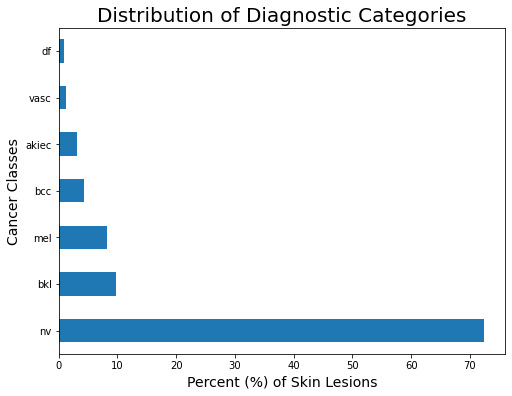

In [12]:
print(" Distribution of the 7 important diagnostic categories of pigmented lesions:")
print(metadata['dx'].value_counts(normalize = True) * 100)

diagnosis = metadata['dx'].value_counts(normalize = True) * 100

plot_distribution(diagnosis, 'Distribution of Diagnostic Categories', 'Percent (%) of Skin Lesions', 'Cancer Classes')

## We prefer balanced classes for a multi-class classification problem but we can clearly see that our diagnostic categories are very imbalanced. Which is to be expected when handling medical data, not all skin cancers occur at the same rate in the population

 Distribution of diagnosis methods
follow_up    49.585007
histo        41.298527
consensus     8.661312
confocal      0.455154
Name: dx_type, dtype: float64


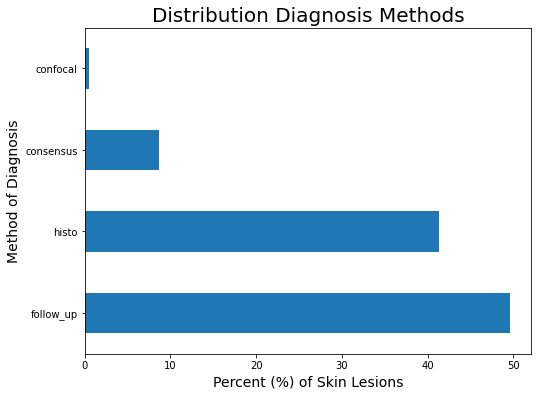

In [13]:
print(" Distribution of diagnosis methods")
print(metadata['dx_type'].value_counts(normalize = True) * 100)

diagnosis_type = metadata['dx_type'].value_counts(normalize = True) * 100

plot_distribution(diagnosis_type, 'Distribution Diagnosis Methods', 'Percent (%) of Skin Lesions', 'Method of Diagnosis')

 Distribution of pigmented lesion localization
lower extremity    21.204819
back               20.535475
trunk              16.987952
abdomen            11.004016
upper extremity    10.388220
face                6.291834
chest               3.212851
foot                3.052209
unknown             2.717537
neck                1.593039
scalp               1.044177
hand                0.856760
genital             0.602410
ear                 0.468541
acral               0.040161
Name: localization, dtype: float64


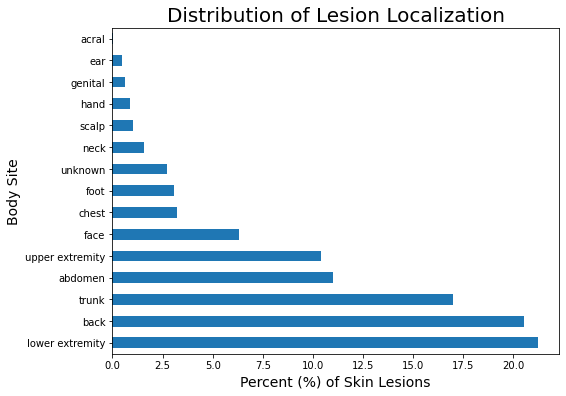

In [14]:
print(" Distribution of pigmented lesion localization")
print(metadata['localization'].value_counts(normalize = True) * 100)

localization = metadata['localization'].value_counts(normalize = True) * 100

plot_distribution(localization, 'Distribution of Lesion Localization', 'Percent (%) of Skin Lesions', 'Body Site')

## Diagnostic distributions in the top 7 localizations

In [15]:
low_extrem_local = metadata[metadata['localization'] == 'lower extremity']
back_local = metadata[metadata['localization'] == 'back']
trunk_local = metadata[metadata['localization'] == 'trunk']
abdomen_local = metadata[metadata['localization'] == 'abdomen']
up_extrem_local = metadata[metadata['localization'] == 'upper extremity']
face_local = metadata[metadata['localization'] == 'face']
chest_local = metadata[metadata['localization'] == 'chest']

In [16]:
print(" Distribution of pigmented lesion diagnostic categories localized on lower extremities:")
print (low_extrem_local['dx'].value_counts(normalize = True) * 100)
low_extrem_diagnosis = low_extrem_local['dx'].value_counts(normalize = True) * 100
print('')

print(" Distribution of pigmented lesion diagnostic categories localized on the back:")
print (back_local['dx'].value_counts(normalize = True) * 100)
back_diagnosis = back_local['dx'].value_counts(normalize = True) * 100
print('')

print(" Distribution of pigmented lesion diagnostic categories localized on the trunk:")
print (trunk_local['dx'].value_counts(normalize = True) * 100)
trunk_diagnosis = trunk_local['dx'].value_counts(normalize = True) * 100
print('')

print(" Distribution of pigmented lesion diagnostic categories localized on the abdomen:")
print (abdomen_local['dx'].value_counts(normalize = True) * 100)
abdomen_diagnosis = abdomen_local['dx'].value_counts(normalize = True) * 100
print('')

print(" Distribution of pigmented lesion diagnostic categories localized on upper extremities:")
print (up_extrem_local['dx'].value_counts(normalize = True) * 100)
up_extrem_diagnosis = up_extrem_local['dx'].value_counts(normalize = True) * 100
print('')

print(" Distribution of pigmented lesion diagnostic categories localized on the face:")
print (face_local['dx'].value_counts(normalize = True) * 100)
face_diagnosis = face_local['dx'].value_counts(normalize = True) * 100
print('')

print(" Distribution of pigmented lesion diagnostic categories localized on the chest:")
print (chest_local['dx'].value_counts(normalize = True) * 100)
chest_diagnosis = chest_local['dx'].value_counts(normalize = True) * 100

 Distribution of pigmented lesion diagnostic categories localized on lower extremities:
nv       77.272727
bkl       6.881313
mel       6.565657
df        3.409091
akiec     2.588384
bcc       2.272727
vasc      1.010101
Name: dx, dtype: float64

 Distribution of pigmented lesion diagnostic categories localized on the back:
nv       68.970013
mel      12.059974
bkl       8.670143
bcc       8.018253
akiec     1.434159
vasc      0.782269
df        0.065189
Name: dx, dtype: float64

 Distribution of pigmented lesion diagnostic categories localized on the trunk:
nv       90.858944
bkl       4.491726
vasc      2.127660
mel       1.970055
bcc       0.472813
akiec     0.078802
Name: dx, dtype: float64

 Distribution of pigmented lesion diagnostic categories localized on the abdomen:
nv       87.469586
bkl       4.379562
mel       3.771290
vasc      2.676399
bcc       1.094891
akiec     0.364964
df        0.243309
Name: dx, dtype: float64

 Distribution of pigmented lesion diagnostic categorie

## Diagnostic Distribution by age

 Distribution of pigmented lesion by age
45.0    14.559180
50.0    13.305473
40.0    10.609329
55.0    10.514964
60.0     8.088434
35.0     7.684012
65.0     6.942572
70.0     6.780803
75.0     5.796711
30.0     4.205985
80.0     3.747641
85.0     2.413049
25.0     2.170396
20.0     1.361553
5.0      0.633594
15.0     0.606633
10.0     0.296576
0.0      0.283095
Name: age, dtype: float64


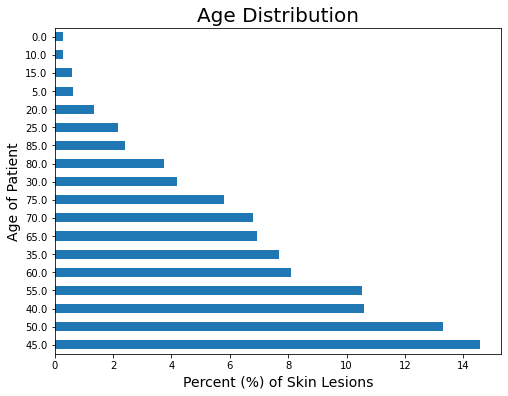

In [17]:
print(" Distribution of pigmented lesion by age")
print(metadata['age'].value_counts(normalize = True) * 100)

age_dist = metadata['age'].value_counts(normalize = True) * 100
plot_distribution(age_dist, 'Age Distribution', 'Percent (%) of Skin Lesions', 'Age of Patient')

# Diagnostic Distribution by sex

 Distribution of pigmented lesion by age
male       53.560910
female     45.769746
unknown     0.669344
Name: sex, dtype: float64


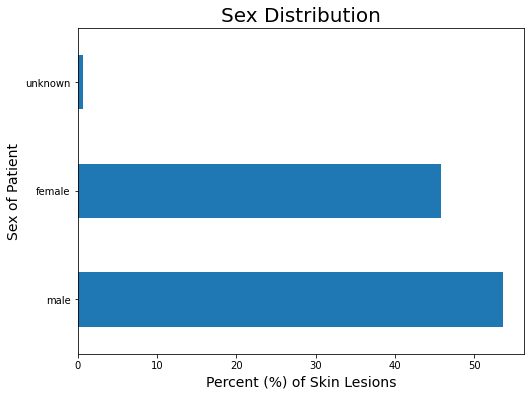

In [18]:
print(" Distribution of pigmented lesion by age")
print(metadata['sex'].value_counts(normalize = True) * 100)

sex_dist = metadata['sex'].value_counts(normalize = True) * 100
plot_distribution(sex_dist, 'Sex Distribution', 'Percent (%) of Skin Lesions', 'Sex of Patient')

In [19]:
def distribution_by_sex (dataframe, column, title):
    var = sns.catplot(x=f'{column}', 
                    kind="count", 
                    hue= "sex", 
                    palette='colorblind', 
                    data= dataframe)
    var.fig.set_size_inches(20, 5)
    var.ax.set_title(title, fontsize=24)
    var.set_xlabels(f'Skin Cancer {column}', fontsize=20)
    var.set_ylabels('Number of Skin Lesions', fontsize=20)
    var._legend.set_title("sex")
    plt.savefig(f'{title}.png', bbox_inches='tight', dpi = 300)

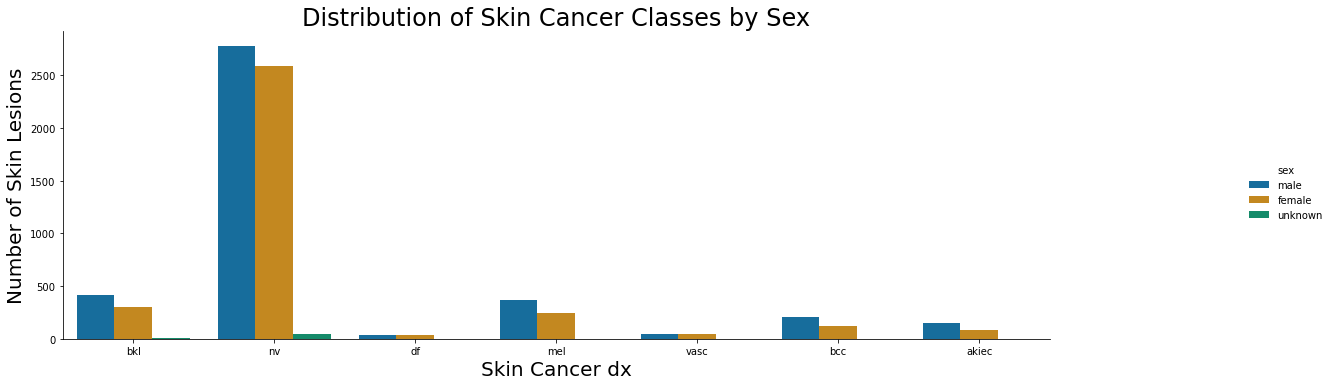

In [20]:
distribution_by_sex(metadata, "dx", "Distribution of Skin Cancer Classes by Sex")

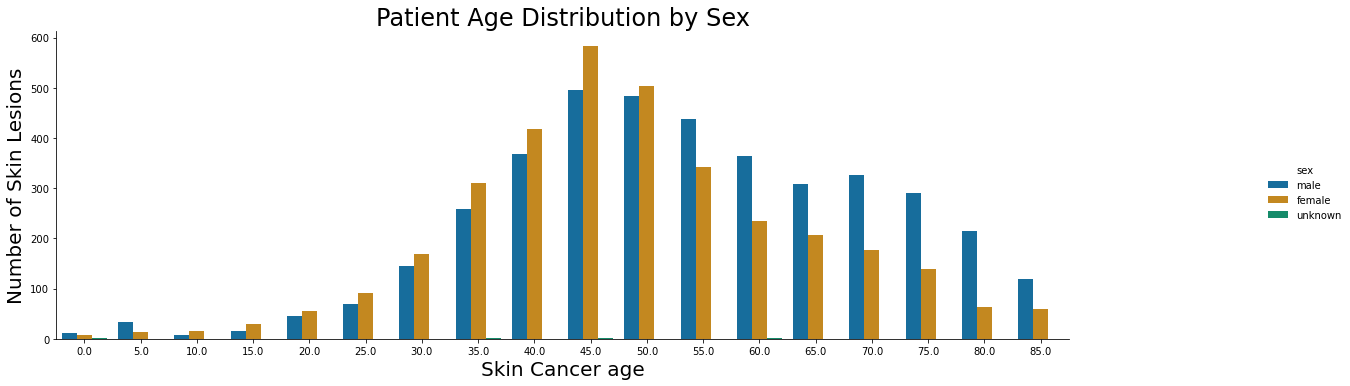

In [21]:
distribution_by_sex(metadata, "age", "Patient Age Distribution by Sex")

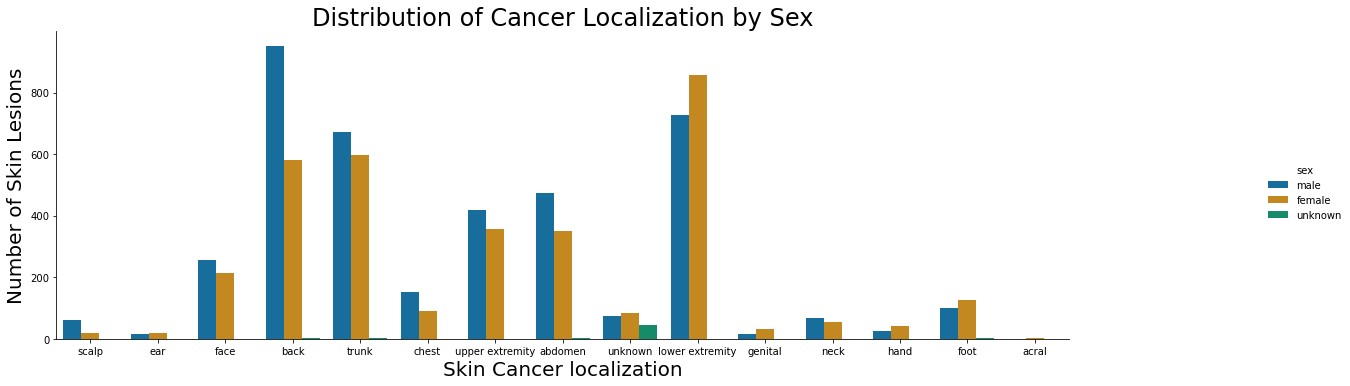

In [22]:
distribution_by_sex(metadata, "localization", "Distribution of Cancer Localization by Sex")